In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
# Build the model
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Flatten, Dropout

def create_simple_nn():
  model = Sequential([
      Flatten(input_shape=(28, 28, 1)),
      Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 Regularization
      Dropout(0.5),  # Thêm Dropout
      Dense(10, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [3]:
def create_cnn():
  model = Sequential([
      layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.01)), # Thêm L2 regularization vào lớp Conv2D đầu tiên
      layers.MaxPooling2D(pool_size=2),
      layers.Conv2D(64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.01)), # Thêm L2 regularization vào lớp Conv2D thứ hai
      layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),# Thêm L2 regularization vào lớp Dense
      Dropout(0.5),  # Thêm Dropout để giảm overfitting
      layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

In [5]:
victim_epochs = 10
victim_batch_size = 128

## Simple_CNN

In [6]:
# Create Simple CNN model
simple_nn_model = create_simple_nn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
history_simple_nn_model = simple_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7173 - loss: 1.8183 - val_accuracy: 0.9204 - val_loss: 0.5096
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8844 - loss: 0.5876 - val_accuracy: 0.9254 - val_loss: 0.4336
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8952 - loss: 0.5241 - val_accuracy: 0.9373 - val_loss: 0.3895
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9035 - loss: 0.4812 - val_accuracy: 0.9412 - val_loss: 0.3648
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9097 - loss: 0.4587 - val_accuracy: 0.9398 - val_loss: 0.3568
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9107 - loss: 0.4512 - val_accuracy: 0.9463 - val_loss: 0.3420
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9122 - loss: 0.4420 - val_accuracy: 0.9470 - val_loss: 0.3357
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9181 - loss: 0.4187 - val_accuracy: 0

In [8]:
simple_nn_model.save("./L2_Regularization/victim_simple_cnn_model.keras")

In [9]:
loss, acc = simple_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.3392
Victim Model Accuracy On Test Set: 95.00%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


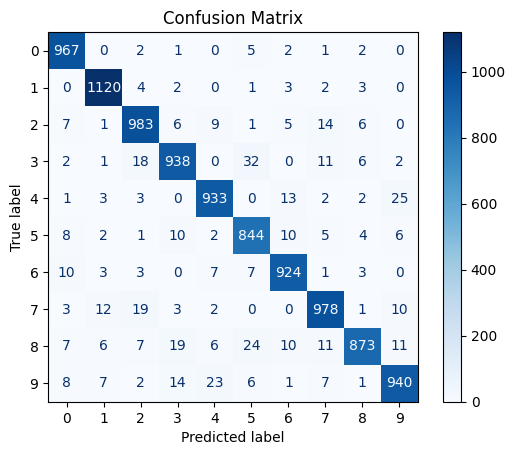

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_prob = simple_nn_model.predict(x_test)

# Convert predictions to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

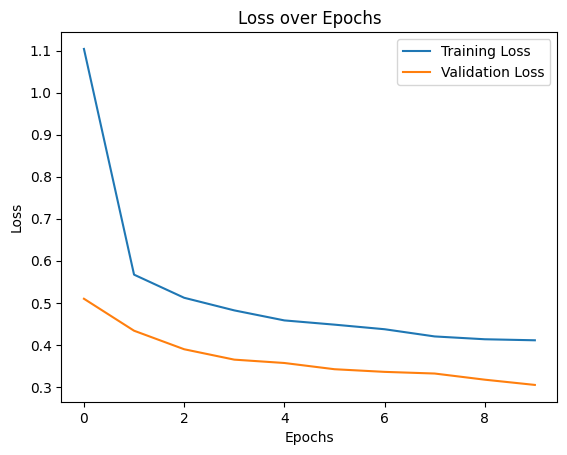

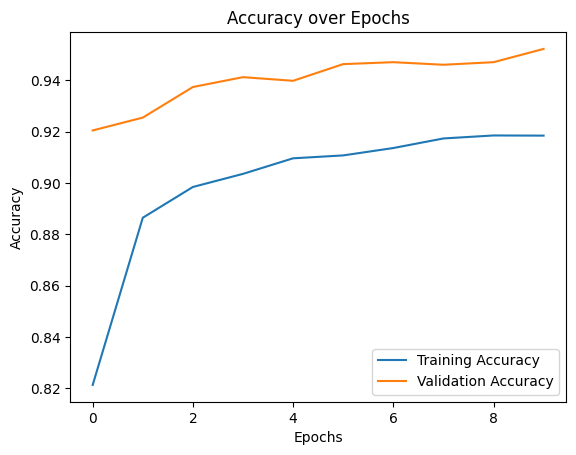

In [11]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_simple_nn_model.history['loss'], label='Training Loss')
plt.plot(history_simple_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_simple_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Convolutional CNN

In [12]:
# Define victim model
c_nn_model = create_cnn()

c:\Users\ngoct\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train victim model
history_c_nn_model = c_nn_model.fit(
    x_train,
    y_train,
    epochs=victim_epochs,
    batch_size=victim_batch_size,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.7452 - loss: 1.7911 - val_accuracy: 0.9600 - val_loss: 0.4076
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9364 - loss: 0.4647 - val_accuracy: 0.9604 - val_loss: 0.3620
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9416 - loss: 0.4193 - val_accuracy: 0.9601 - val_loss: 0.3360
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9489 - loss: 0.3772 - val_accuracy: 0.9696 - val_loss: 0.3015
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9514 - loss: 0.3599 - val_accuracy: 0.9736 - val_loss: 0.2820
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9542 - loss: 0.3409 - val_accuracy: 0.9736 - val_loss: 0.2782
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9504 - loss: 0.3421 - val_accuracy: 0.9685 - val_loss: 0.2748
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9553 - loss: 0.3192 - 

In [14]:
c_nn_model.save("./L2_Regularization/victim_cnn_model.keras")

In [15]:
# Evaluate victim model
loss, acc = c_nn_model.evaluate(x_test, y_test)
print(f"Victim Model Accuracy On Test Set: {acc * 100.0:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9668 - loss: 0.2652
Victim Model Accuracy On Test Set: 97.31%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


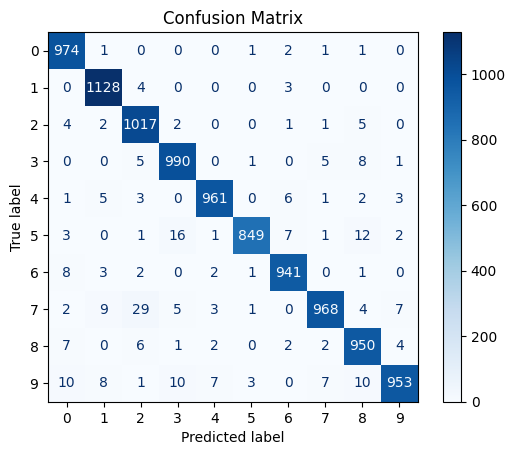

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class probabilities
y_pred_prob = c_nn_model.predict(x_test)

# Convert predictions to class indices
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

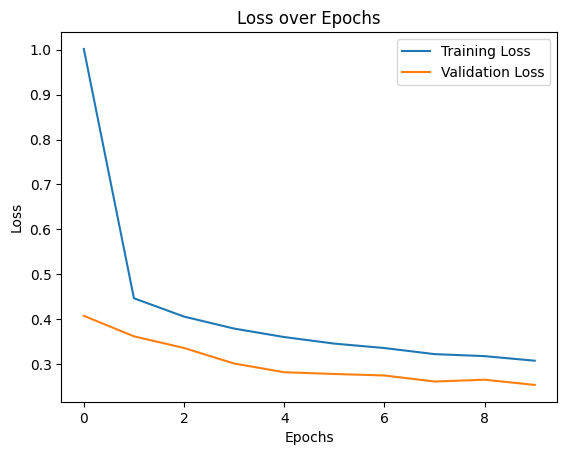

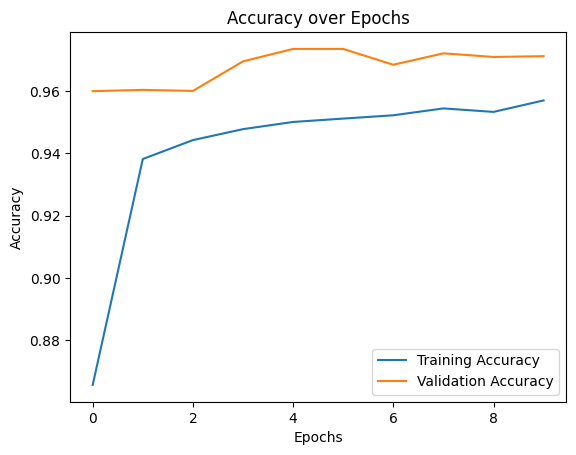

In [17]:
# Accessing and Displaying Training History
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history_c_nn_model.history['loss'], label='Training Loss')
plt.plot(history_c_nn_model.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_c_nn_model.history['accuracy'], label='Training Accuracy')
plt.plot(history_c_nn_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()